# About

This notebook is a basic example for looking at individual events, events, creating a solution and submitting it. It walks through some of the library function for accessing the data and writing a submission file. 
This example uses DBScan to solve the tracking problem. 

In [2]:
#import sys
#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install --user git+https://github.com/LAL/trackml-library.gitl-library.git

import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from trackml.dataset import load_event, load_dataset
from trackml.score import score_event

# Change this according to your directory preferred setting
path_to_train = "input/"
# This event is in Train_1
event_prefix = "event000001042"

hits, cells, particles, truth = load_event(os.path.join(path_to_train, event_prefix))
hits.head()

print(hits)

#data = [(74.5791, 18.7019, -1498.0), (64.5581, 16.3475, -1298.0), (54.6152, 13.909, -1098.0), (54.7899, 13.9544, -1102.0), (47.6258, 12.1795, -958.0), (47.8209, 12.2584, -962.0), (40.8605, 10.5133, -822.5), (40.6364, 10.4501, -818.0), (40.8193, 10.4947, -822.0), (34.8866, 8.98988, -702.5), (34.6862, 8.97018, -698.0), (34.8622, 9.00137, -702.0), (-147.462, 62.8427, -698.0), (29.9064, 7.7453, -602.5), (29.6804, 7.66555, -598.0), (29.898, 7.75694, -602.0), (-127.871, 49.9292, -598.0), (-128.682, 50.4098, -602.0), (-31.5864, 7.07015, -141.2), (-31.0981, 6.93529, -139.0), (-31.9055, -5.50469, -63.056), (-3.57057, -31.7838, -25.4438), (16.5893, -28.0009, -29.4773), (29.0088, 13.7897, 0.746876), (32.925, 2.58876, -11.5666), (32.6593, 3.34871, 0.128124), (30.0839, 14.2573, 0.803123), (1.47582, 34.3461, -59.9671), (-30.3159, -8.55085, 17.4089), (-19.5865, -25.4608, 16.865), (31.1501, -6.0144, 3.90648), (28.5514, 13.5977, 0.715626), (32.1525, 3.29815, 0.103951), (29.606, 14.0491, 0.771873), (-2.03589, 31.6042, 14.4076), (-2.08934, 32.5751, 14.8907), (7.68493, -31.1432, 135.814), (31.8255, -2.83178, 113.019), (-21.1411, -23.5261, 174.417), (-21.8604, -24.3651, 180.542), (17.5965, -27.1013, 270.624), (-16.4771, -26.9592, 289.262), (-69.3461, 19.6434, -313.023), (-70.0024, -12.808, -137.19), (5.97047, 71.36, -123.526), (-7.51706, -71.9203, -56.0689), (37.3427, -61.3198, -63.551), (72.152, 6.05238, -23.9389), (-69.834, -18.2994, 41.3285), (-44.5631, -56.0451, 39.1781), (69.716, -14.0517, 10.1656), (71.7163, -14.4825, 10.4887), (71.4738, 6.74731, 1.67188), (65.2158, 28.2501, 3.07812), (66.906, 28.8557, 3.19062), (-5.308, 71.8232, 34.1962), (71.6982, -2.209, 255.62), (16.6993, -70.5766, 308.678), (-113.438, -22.1132, -222.173), (14.8566, 114.597, -198.455), (15.3452, 116.702, -201.97), (-11.1975, -115.874, -89.5369), (61.2978, -97.9029, -101.341), (115.369, 10.3137, -37.5852), (-111.846, -26.8988, 66.4089), (-113.899, -27.2742, 67.6278), (-73.9016, -89.6604, 64.318), (113.723, -24.042, 17.3314), (114.955, 9.86314, 3.35938), (107.074, 41.693, 5.66563), (108.899, 42.2025, 5.77813), (-9.66327, 114.996, 55.4422), (116.718, 3.67305, 418.795), (25.3324, -112.367, 490.441), (32.5092, 169.916, -297.225), (93.5895, -144.287, -150.24), (-14.801, -171.251, -131.698), (172.103, 16.6093, -55.5266), (168.085, -37.51, 26.2531), (170.565, 12.6533, 5.53385), (172.625, 12.7341, 5.60938), (162.293, 53.7447, 8.92812), (164.338, 54.0822, 9.04751), (-168.287, -35.8105, 99.624), (-112.526, -130.055, 95.7036), (-16.551, 171.088, 83.1214), (-36.2281, -54.1584, 598.0), (-36.5159, -54.4689, 602.0), (29.9758, -137.168, 598.0), (38.632, -59.836, 598.0), (164.574, 16.7005, 598.0), (-33.9642, 1.51487, 702.5), (-43.2576, -62.3888, 698.0), (-43.5496, -62.6932, 702.0), (34.076, -160.279, 698.0), (45.0206, -69.8784, 698.0), (-33.9371, 1.48858, 702.0), (-33.7288, 1.47588, 697.5), (-39.7507, 1.91209, 822.5), (-51.9625, -72.042, 818.0), (-52.2723, -72.3462, 822.0), (52.6864, -81.9094, 818.0), (-39.7378, 1.90422, 822.0), (-39.5086, 1.88061, 817.5), (-46.5023, 2.38382, 962.5), (-62.8269, -83.2079, 962.0), (61.8011, -96.4148, 962.0), (61.5499, -96.0007, 958.0), (-46.2499, 2.361, 957.5), (-53.2578, 2.9054, 1102.5), (-73.397, -93.2803, 1098.0), (-73.7204, -93.5954, 1102.0), (70.6713, -110.49, 1102.0), (70.4151, -110.092, 1098.0), (-53.027, 2.89437, 1097.5), (-89.3871, -107.527, 1298.0), (82.9998, -130.233, 1298.0), (-62.7204, 3.75757, 1297.5), (-106.085, -120.827, 1498.0), (-72.466, 4.67503, 1497.5), (-339.543, 526.156, -2948.5), (-328.019, 438.452, -2551.5), (-328.416, 437.912, -2545.5), (-315.014, 349.62, -2154.5), (-293.961, 269.244, -1801.5), (-267.869, 203.859, -1498.5), (-595.363, -203.088, -1215.5), (423.613, 499.792, -1218.5), (-232.783, 147.607, -1215.5), (-251.487, -58.841, -496.4), (71.3897, 250.076, -449.0), (-18.2218, -261.228, -200.2), (149.661, -217.461, -229.8), (258.238, 27.7524, -83.2), (254.038, -61.6298, 40.2), (260.243, 14.223, 9.0), (254.24, 61.4543, 13.8), (-259.4, -43.9909, 152.8), (-252.79, -43.6568, 149.2), (-175.053, -188.289, 143.8), (-30.3857, 258.426, 126.4), (-262.385, -44.1464, 154.4), (251.266, 61.4182, 945.8), (-345.633, -90.5301, -687.4), (134.975, 336.012, -633.0), (-18.6429, -358.241, -273.6), (211.855, -290.159, -313.2), (360.138, 43.4876, -115.6), (353.758, 42.3838, -113.2), (360.141, 11.8765, 12.6), (356.521, 53.5245, 18.6), (347.765, -92.1119, 56.8), (-363.175, -44.0939, 212.6), (-356.689, -44.3527, 208.2), (-259.997, -255.487, 204.2), (-255.332, -252.097, 201.4), (-50.525, 356.576, 175.4), (-477.982, -144.993, -963.2), (252.783, 433.151, -897.12), (247.391, 429.853, -886.2), (-12.8838, -499.553, -381.4), (314.379, -393.855, -439.0), (498.102, 69.2952, -159.8), (505.074, 0.476575, 18.6), (500.069, 10.8995, 28.2), (498.996, 1.15838, 17.4), (477.466, -141.625, 78.4), (-88.0956, 494.921, 245.0), (-499.166, -29.7837, 291.0), (-377.146, -330.46, 283.2), (-372.027, -327.627, 279.6), (434.783, -496.117, -575.4), (2.75194, -658.916, -502.8), (653.66, 104.398, -211.4), (656.895, -91.1926, 39.0), (660.821, -22.368, 23.4), (625.805, -209.947, 104.8), (-141.956, 646.558, 324.0), (-139.605, 640.643, 320.4), (-526.492, -401.218, 376.6), (-663.001, 10.4455, 388.0), (50.9648, -280.983, 1218.5), (50.7753, -279.628, 1215.5), (308.433, 109.917, 1215.5), (57.1368, -345.503, 1498.5), (360.011, 171.404, 1501.5), (360.357, 172.015, 1504.5), (61.9471, -415.697, 1801.5), (402.767, 244.127, 1804.5), (65.5342, -496.031, 2151.5), (135.713, -215.951, 2148.5), (438.221, 328.346, 2151.5), (437.357, 327.194, 2148.5), (-201.609, -178.88, 2548.5), (68.3465, -586.732, 2548.5), (160.423, -256.432, 2548.5), (469.558, 417.093, 2548.5), (-239.598, -197.623, 2945.5), (70.7678, -676.223, 2945.5), (70.7017, -676.266, 2948.5), (185.066, -296.957, 2948.5), (-846.07, -365.572, -1802.5), (737.893, 479.623, -1797.5), (738.652, 477.646, -1802.5), (-724.827, -278.868, -1497.5), (580.698, 514.765, -1494.5), (568.955, -589.855, -715.6), (28.9588, -822.146, -630.6), (804.935, 144.934, -260.4), (783.154, -257.786, 48.6), (779.439, -250.895, 48.6), (820.538, -57.7025, 27.0), (764.758, -285.949, 130.0), (781.457, -254.667, 54.4), (777.682, -247.652, 54.4), (-209.383, 797.291, 406.6), (-681.034, -450.247, 466.4), (-814.027, 72.603, 477.2), (753.581, -690.784, -900.0), (747.175, -687.798, -889.2), (74.4463, -1020.52, -786.2), (1000.24, 207.585, -325.2), (1013.01, -117.136, 37.8), (849.482, -565.409, 76.0), (850.036, -555.619, 76.0), (938.461, -399.67, 168.2), (-305.428, 970.799, 498.8), (-903.241, -482.321, 601.8), (-1001.89, 194.612, 612.6)]
data = [(-166.959, -26.3441, -1498.0), (-82.4397, -37.7466, -1502.0), (11.3996, -149.674, -1498.0), (91.4427, -67.9066, -1502.0), (91.1692, -67.7554, -1498.0), (76.4656, 67.0503, -1502.5), (35.9852, 70.158, -1502.0), (35.8718, 69.9435, -1497.5), (-68.483, 68.2885, -1502.0), (-116.759, 116.511, -1498.0), (-68.2695, 68.0722, -1497.5), (-144.424, -23.4025, -1298.0), (-71.3431, -32.9338, -1302.0), (8.15945, -129.552, -1298.0), (33.391, -149.068, -1298.0), (78.5365, -58.9559, -1297.5), (65.9847, 58.3618, -1302.5), (31.3025, 60.6983, -1302.0), (31.1997, 60.4933, -1297.5), (-68.26, 145.743, -1298.0), (-59.7038, 58.7023, -1302.0), (-102.775, 99.0096, -1298.0), (-59.4812, 58.5278, -1297.5), (-121.895, -20.2598, -1098.0), (-122.341, -20.3248, -1102.0), (-60.2847, -28.0285, -1102.0), (-60.0164, -27.8939, -1097.5), (5.33512, -109.442, -1098.0), (26.0811, -126.505, -1098.0), (66.0135, -50.1671, -1097.5), (66.3347, -50.3551, -1102.5), (55.6115, 49.6337, -1102.5), (26.5606, 51.3335, -1102.0), (26.4398, 51.0924, -1097.5), (-60.0013, 122.212, -1098.0), (-60.169, 122.666, -1102.0), (-50.842, 49.3274, -1102.0), (-88.3853, 81.986, -1098.0), (-50.6346, 49.131, -1097.5), (-88.684, 82.3186, -1102.0), (-106.164, -17.9645, -958.0), (-52.5332, -24.5471, -962.0), (-52.268, -24.4358, -957.5), (3.74647, -95.7176, -962.0), (21.5203, -111.026, -962.0), (21.4063, -110.56, -958.0), (57.3443, -43.8807, -957.5), (57.6683, -44.106, -962.5), (48.3528, 43.4342, -962.5), (23.2221, 44.7371, -962.0), (23.1288, 44.536, -957.5), (-43.7826, 155.687, -958.0), (-44.0339, 156.317, -962.0), (-53.6671, 105.885, -958.0), (-53.8725, 106.327, -962.0), (-44.5788, 42.841, -962.0), (-77.9339, 70.4739, -958.0), (-44.3466, 42.6427, -957.5), (-78.2554, 70.7992, -962.0), (-90.4852, -15.5788, -818.0), (-44.8008, -21.0195, -822.0), (-44.5526, -20.9393, -817.5), (-99.9299, -124.372, -818.0), (2.33615, -81.6214, -822.0), (17.1339, -94.3926, -817.5), (48.7089, -37.588, -817.5), (49.0048, -37.8002, -822.5), (41.144, 37.2116, -822.5), (40.9189, 37.016, -818.0), (19.8835, 38.1407, -822.0), (19.7545, 37.9578, -817.5), (-35.3841, 133.519, -818.0), (-46.9166, 89.7234, -818.0), (-38.2258, 36.4034, -822.0), (-67.1024, 59.1849, -817.5), (-38.0112, 36.2025, -817.5), (-77.5619, -13.5522, -702.5), (-77.0467, -13.4838, -698.0), (-38.1926, -18.0117, -702.0), (-37.9538, -17.8924, -697.5), (-87.5812, -104.1, -698.0), (1.37908, -69.162, -698.0), (13.9942, -81.0088, -702.0), (1.38728, -69.565, -702.0), (13.8958, -80.4765, -697.5), (41.3726, -32.1465, -697.5), (41.6759, -32.3708, -702.5), (35.0465, 31.8722, -702.5), (34.8204, 31.6463, -698.0), (16.8655, 32.3345, -698.0), (16.9754, 32.5339, -702.0), (16.8794, 32.3233, -697.5), (-28.7063, 114.299, -698.0), (-40.7766, 76.0695, -698.0), (-32.7039, 30.9389, -702.0), (-32.5095, 30.6918, -697.5), (-57.6205, 49.7715, -697.5), (-66.3798, -11.7479, -602.5), (-65.8626, -11.6728, -598.0), (-32.4541, -15.3761, -598.0), (-32.6757, -15.456, -602.0), (-32.4521, -15.342, -597.5), (-77.1019, -88.303, -602.0), (-76.6537, -87.6537, -598.0), (0.766391, -59.1268, -598.0), (0.797166, -59.5178, -602.0), (11.403, -69.3715, -602.0), (11.2578, -68.846, -597.5), (35.2902, -27.6092, -597.5), (35.5871, -27.8185, -602.5), (29.9391, 27.3786, -602.5), (14.4536, 27.6629, -598.0), (29.7143, 27.1306, -598.0), (14.5538, 27.8166, -602.0), (14.4425, 27.6159, -597.5), (-23.3735, 98.1072, -597.5), (-35.6752, 65.2879, -602.5), (-35.4422, 64.7742, -598.0), (-28.1226, 26.3448, -602.0), (-27.9051, 26.1675, -597.5), (-49.6169, 42.0152, -597.5), (-31.794, -5.8235, -292.603), (4.41876, -32.2852, -282.185), (-25.4906, 20.6652, -305.032), (-28.9639, -12.4178, -248.428), (-30.4706, -13.0811, -261.077), (4.33607, -31.7896, -277.931), (-8.91165, 30.1898, -237.512), (-16.2306, 27.6575, -264.09), (-22.8202, -22.3894, -168.65), (-24.1468, -23.8129, -178.49), (-5.96162, 31.7457, -196.076), (-5.12579, -31.2002, -69.6604), (7.84926, -30.5612, -73.4409), (24.2054, 20.0954, -85.9693), (27.9975, 15.8499, -90.0559), (-6.94758, 30.8765, -70.3872), (-8.22157, 30.4311, -85.5375), (-20.7565, -25.4467, -19.5857), (-5.21941, -31.6908, -70.6474), (28.2025, -15.0375, -1.62668), (22.9558, 22.2377, -17.2726), (25.7592, 19.0991, -36.8688), (24.416, 23.6832, -17.9468), (5.87785, 31.6537, -30.7121), (9.73474, 31.4361, -27.0609), (2.22037, 31.86, -33.6163), (-11.8875, 29.6738, -9.62351), (-13.5065, 29.1078, -11.0412), (-14.0466, 30.2721, -11.2117), (-12.6304, 31.5371, -9.81203), (-14.2945, 30.0506, -11.0473), (-26.8834, 17.7751, -41.6324), (-31.815, -4.26327, 60.1404), (-31.158, -6.14246, 33.0841), (-22.8945, -21.5631, 61.6473), (-24.4913, -23.0973, 66.464), (-6.39002, -31.1289, 21.0906), (7.20784, -30.7855, 18.2732), (18.7886, -25.3726, 21.0248), (24.8326, -20.8902, 32.0517), (31.2413, -4.39695, 69.5109), (31.5957, 1.88612, 9.7755), (32.4637, 2.40799, 67.8109), (29.889, 9.77194, 51.7491), (32.6387, 1.9075, 10.3262), (23.3061, 21.1022, 17.3915), (26.459, 17.5724, 44.4273), (0.592614, 31.4559, 13.7547), (0.603425, 33.5166, 15.1044), (-8.34827, 30.3868, 46.228), (-22.2582, 22.2736, 45.8321), (-23.5461, 23.56, 48.8637), (-25.159, 20.2129, 25.8742), (-25.1341, 20.2645, 34.5297), (-26.868, 16.6664, 4.27377), (-28.4018, 13.4835, 35.969), (-31.2541, 4.16959, 69.4921), (-30.6704, 14.5183, 39.3), (-18.3643, -26.5994, 135.979), (-10.4696, -31.3947, 78.3911), (25.4306, -20.7898, 83.7112), (31.7329, -4.47379, 70.7185), (24.6587, 20.3311, 76.7729), (-31.7859, 3.53352, 84.8457), (-31.54, 7.89295, 99.0554), (-31.7463, 4.23487, 70.7051), (-28.5184, -13.6921, 169.266), (-31.4154, -5.40631, 148.572), (-28.7996, -12.8877, 166.13), (-29.6405, -10.4826, 148.268), (-28.9639, -12.4178, 175.088), (-29.512, -14.1543, 175.365), (-28.3887, -15.4119, 173.925), (-27.752, -16.1248, 206.7), (-30.4934, -13.0556, 184.644), (-30.13, -13.4625, 174.061), (-9.38942, -30.9597, 174.944), (19.0142, -25.1712, 144.742), (24.9909, -20.5618, 167.787), (-19.6106, 24.6384, 158.1), (-28.1878, -16.3801, 210.064), (-27.9998, -16.5906, 216.078), (-15.1791, 69.9362, -425.885), (-15.6317, 71.6179, -436.08), (-49.9767, -52.7467, -374.894), (-13.5886, -70.2892, -148.823), (-14.0594, -72.1941, -152.698), (19.931, -69.6226, -160.015), (61.6598, 36.8772, -192.78), (54.7425, 46.8534, -187.994), (-15.0074, 69.9779, -150.668), (-20.7679, 69.2342, -188.033), (-15.3516, 71.7479, -154.306), (55.3484, 45.6236, -73.7273), (-58.5021, 40.5306, -83.8266), (-45.5202, -56.0417, -34.9184), (50.8187, 50.462, -30.2346), (52.2502, 51.9412, -30.9118), (13.2881, 70.336, -59.9614), (20.4692, 69.2174, -51.2095), (13.6468, 72.1768, -61.3532), (5.26669, 71.8261, -67.2415), (-26.6872, 66.487, -13.1469), (-30.7777, 66.1152, -16.4536), (-27.5017, 68.5082, -13.3337), (-31.1732, 65.8264, -16.0887), (-14.2391, -69.6868, 55.6486), (-14.6478, -71.7232, 57.4688), (16.1032, -70.8533, 50.8325), (43.2763, -57.9008, 56.9051), (43.8406, -57.2871, 65.7024), (63.196, -34.0463, 4.81239), (72.4455, 2.7451, 31.1509), (55.1401, 45.8151, 48.3998), (0.195628, 71.1184, 39.7558), (0.147464, 73.1477, 41.0813), (-55.4922, 45.4706, 65.854), (-62.4998, 35.9484, 18.4025), (-70.3065, -18.4574, 84.7313), (44.1305, -57.7033, 74.5387), (55.3468, -46.6608, 79.882), (68.7539, 21.8027, 127.646), (59.3035, 40.103, 108.638), (60.8849, 41.2045, 111.746), (-18.8796, 70.1105, 115.334), (-51.111, 50.1131, 112.852), (-52.4685, 51.3847, 115.968), (-56.0637, 45.4841, 85.5664), (-65.0195, 30.5049, 90.8531), (-72.1573, -3.93205, 144.706), (-51.3167, -49.3314, 148.228), (-19.4946, -68.8682, 178.37), (56.1747, -44.3504, 190.236), (71.5602, -10.7538, 168.223), (72.1315, 4.03822, 158.968), (56.4961, 44.5681, 181.582), (-71.4486, 8.08594, 199.17), (-71.5219, 9.83822, 167.81), (-69.3606, 19.55, 228.032), (-70.3398, -11.4182, 340.781), (-67.506, -23.3154, 345.331), (-38.9907, -59.4403, 307.199), (-39.947, -61.0362, 315.392), (42.156, -59.1189, 342.033), (68.3159, 21.5704, 324.463), (-66.7485, -29.9108, 393.994), (-65.7037, -31.3411, 398.341), (-63.1633, -34.8189, 396.792), (-21.9972, -68.9794, 399.872), (57.7354, -42.7405, 381.476), (-46.5867, 55.0326, 370.083), (-61.6399, -36.0651, 468.193), (-61.2064, -36.6586, 481.652), (98.0137, 61.9456, -306.877), (86.5435, 76.4733, -297.206), (87.9765, 77.8525, -302.215), (-36.8072, 109.934, -297.959), (-25.871, -113.647, -237.928), (35.079, -110.205, -252.129), (-23.0255, 113.135, -239.017), (85.7326, 78.9223, -115.878), (31.307, 111.021, -77.8878), (21.9262, 113.81, -92.8441), (8.96635, 115.697, -104.192), (-93.2168, 67.7554, -131.781), (-73.2386, -90.616, -52.1845), (81.3131, 82.8699, -44.8462), (-49.4251, 104.926, -21.5936), (-43.6789, 108.552, -17.1668), (-49.1008, 105.131, -22.1469), (101.122, -55.047, 11.8044), (116.627, 1.63171, 54.4022), (-1.66896, 116.62, 69.693), (-101.583, 53.9677, 33.6188), (-103.445, 54.7536, 34.3324), (-109.867, -36.9489, 139.152), (-23.1552, -114.255, 95.5577), (24.9165, -113.027, 85.0203), (70.2191, -93.0422, 95.8863), (70.5072, -92.7428, 123.702), (70.9421, -92.2909, 110.226), (89.3155, -75.4862, 133.246), (93.0363, 70.2247, 83.1562), (-1.69986, 117.118, 70.0155), (-89.5736, 75.0402, 111.63), (110.723, 33.9843, 209.063), (94.6661, 65.27, 178.504), (96.2657, 66.4298, 181.686), (-29.7306, 112.736, 189.23), (-83.4222, 79.7564, 186.187), (-89.9283, 73.4386, 141.71), (-105.217, 48.6601, 150.825), (-83.0277, -81.5788, 246.519), (114.456, -18.2945, 273.511), (116.58, 4.35162, 261.008), (111.208, 34.116, 210.008), (-114.539, 16.2738, 272.95), (-115.754, 3.46212, 237.222), (-25.9003, -113.646, 295.92), (92.1008, -69.6842, 311.198), (92.8076, 69.7577, 297.533), (-114.173, 13.1463, 322.361), (-116.048, 13.3711, 327.77), (-110.882, 35.222, 372.595), (142.808, 96.71, -453.645), (126.856, 117.258, -441.611), (-60.2641, 160.537, -438.118), (-61.1578, 162.302, -443.103), (58.0488, -161.087, -371.063), (-32.0189, 168.138, -350.936), (-45.2645, -166.832, -349.316), (117.861, 124.319, -167.343), (118.818, 125.888, -169.048), (14.2292, 171.713, -151.461), (-135.736, 105.125, -193.391), (-106.932, -133.166, -73.3535), (-108.065, -134.606, -74.0675), (43.9618, 166.468, -112.966), (33.0724, 167.578, -133.606), (33.4568, 169.401, -134.985), (118.118, 124.117, -62.9694), (119.344, 125.539, -63.5855), (-72.8304, 155.261, -29.4824), (-64.6626, 160.188, -22.0906), (-72.6773, 155.353, -28.6927), (-73.5277, 157.208, -28.9531), (-73.6944, 157.088, -29.7434), (149.979, -82.8044, 20.8912), (-154.981, 74.2248, 54.0418), (35.4865, -167.58, 129.218), (35.8249, -169.411, 130.705), (171.727, -3.10069, 83.4281), (143.591, 95.8592, 127.62), (-5.88372, 171.421, 105.953), (-6.07716, 173.436, 107.287), (-157.869, -69.5317, 209.982), (-33.5966, -167.525, 143.222), (-33.9602, -169.391, 144.887), (104.141, -136.343, 144.297), (103.436, -137.047, 185.635), (104.835, -135.65, 165.575), (131.361, -111.391, 199.458), (-130.673, 112.526, 168.095), (-158.248, -69.8562, 210.591), (140.495, 99.2216, 270.25), (-126.067, 116.773, 280.604), (-133.06, 109.543, 213.636), (-156.49, 71.0572, 226.956), (164.699, 48.3854, 313.306), (-42.6501, 166.138, 281.553), (-125.688, 116.452, 279.773), (-120.755, -122.048, 366.824), (169.102, -29.043, 408.192), (172.924, 2.46867, 390.228), (-171.081, 25.2928, 411.429), (-171.053, 23.8188, 358.401), (-27.7075, -169.523, 440.294), (140.131, -99.9943, 467.089), (139.838, 99.2043, 443.008), (-170.486, 20.0646, 484.76), (-122.586, -18.3873, 598.0), (-116.378, -38.9269, 598.0), (-101.319, -45.5839, 602.0), (-98.8086, -46.935, 602.0), (-75.6377, -45.5006, 597.5), (-78.3596, -45.9957, 597.5), (-98.16, -46.6335, 598.0), (-94.3129, -52.7895, 598.0), (-69.9686, -117.265, 598.0), (-33.8591, -102.202, 598.0), (69.5278, -104.727, 598.0), (92.7809, -61.6398, 598.0), (123.344, 43.371, 598.0), (-78.189, 86.1371, 602.0), (-77.6124, 85.638, 598.0), (-142.958, -20.7516, 698.0), (-135.789, -44.8001, 698.0), (-117.931, -53.1376, 702.0), (-115.088, -54.5605, 702.0), (-109.681, -61.922, 698.0), (-114.432, -54.2663, 698.0), (-91.331, -53.7613, 698.0), (-91.837, -54.0916, 702.0), (-79.5986, -137.615, 698.0), (-40.0905, -118.906, 698.0), (79.3027, -123.067, 698.0), (109.394, -69.3305, 698.0), (110.061, -69.6312, 702.0), (143.171, 52.1258, 698.0), (-92.3803, 98.8225, 702.0), (-91.7987, 98.3333, 698.0), (-167.428, -23.3299, 818.0), (-159.142, -51.6778, 818.0), (-134.634, -63.6826, 822.0), (-106.781, -63.1112, 818.0), (-128.06, -72.9599, 818.0), (-102.97, -62.5337, 818.0), (-107.303, -63.4133, 822.0), (-103.461, -62.8422, 822.0), (-47.8246, -138.834, 818.0), (90.7585, -146.143, 822.0), (90.409, -145.385, 818.0), (130.704, -77.9812, 822.0), (-109.375, 112.946, 818.0), (-157.475, -74.26, 962.0), (-120.245, -73.4148, 958.0), (-124.793, -74.0595, 958.0), (-149.379, -86.0367, 958.0), (-120.722, -73.7567, 962.0), (-57.199, -161.927, 958.0), (-142.774, -85.0478, 1098.0), (-137.463, -84.4362, 1098.0), (-137.97, -84.7238, 1102.0), (-331.637, -43.7732, -2945.5), (-176.561, -534.851, -2945.5), (-176.405, -535.179, -2948.5), (46.6967, -294.772, -2948.5), (118.285, -329.197, -2948.5), (-118.538, 349.537, -2945.5), (-208.778, 435.884, -2951.5), (-208.936, 435.927, -2954.5), (-210.912, 254.591, -2948.5), (-286.091, -39.4789, -2545.5), (-176.684, -456.971, -2554.5), (35.6828, -254.982, -2548.5), (94.542, -285.481, -2548.5), (-106.903, 298.86, -2545.5), (-174.16, 383.981, -2551.5), (-185.181, 215.089, -2548.5), (-240.6, -34.8695, -2145.5), (-173.934, -377.58, -2154.5), (72.4989, -242.415, -2145.5), (72.562, -242.401, -2148.5), (-137.697, 331.071, -2145.5), (-96.1306, 249.147, -2145.5), (-165.638, -306.907, -1795.5), (439.13, 519.653, -1798.5), (-106.943, 282.245, -1795.5), (-441.138, 521.116, -1795.5), (-152.613, -249.361, -1498.5), (434.2, -520.557, -1495.5), (391.511, 410.914, -1495.5), (366.975, 461.503, -1498.5), (-81.9996, 237.689, -1495.5), (-339.904, 465.827, -1498.5), (-338.79, 465.025, -1495.5), (-322.249, -500.185, -1215.5), (320.841, -456.743, -1218.5), (339.404, 319.242, -1224.5), (314.009, 365.003, -1221.5), (-52.0028, 597.898, -1215.5), (-253.291, 401.816, -1224.5), (-252.279, 400.968, -1221.5), (205.397, 153.697, -673.0), (186.306, 184.36, -667.6), (103.912, -240.644, -566.6), (184.387, 182.045, -660.0), (-106.857, 239.915, -669.3), (-84.2322, -247.683, -525.6), (-81.5116, -242.765, -514.8), (102.169, -238.019, -560.4), (-43.6451, 259.376, -535.2), (-42.9262, 252.853, -522.0), (-196.754, 167.719, -288.6), (159.164, 211.158, -255.8), (60.1103, 254.655, -168.2), (52.8831, 257.588, -201.8), (23.7022, 259.953, -225.8), (172.983, 190.677, -91.6), (229.052, -129.404, 35.4), (-110.565, 238.997, -40.2), (-112.661, 238.478, -41.4), (-98.2176, 242.054, -29.4), (258.403, -17.2722, 130.0), (-240.171, 96.6888, 85.6), (-50.9187, -258.386, 224.6), (50.4282, -255.186, 200.2), (159.72, -205.141, 222.2), (159.856, -205.056, 254.6), (228.006, 124.704, 197.0), (-17.0425, 260.445, 165.4), (-193.835, 174.172, 258.2), (-220.429, -135.016, 321.36), (153.357, -205.608, 280.8), (-198.89, 165.868, 324.8), (-235.771, 103.985, 343.8), (214.191, 157.399, 421.4), (209.158, 153.268, 410.8), (-195.77, 172.496, 430.0), (250.666, 68.4058, 478.4), (-249.043, 81.9773, 556.1), (-244.501, 77.2371, 542.6), (258.822, -49.8439, 631.2), (264.013, -6.24812, 600.0), (-262.343, 41.1713, 636.0), (-256.147, 40.0653, 620.4), (-16.0644, -258.684, 675.4), (215.661, -140.704, 702.1), (218.162, 140.381, 675.4), (-255.204, 31.025, 729.4), (-239.3, 103.877, 844.2), (273.804, 228.963, -936.4), (244.967, 259.967, -907.6), (-165.921, 316.544, -913.2), (164.99, -320.052, -779.3), (-138.554, -330.39, -719.8), (162.92, -317.656, -772.6), (-51.4223, 353.593, -724.6), (-260.355, 248.496, -400.2), (180.29, 308.487, -349.2), (74.4021, 348.706, -271.8), (35.3615, 354.746, -306.0), (72.1313, 352.577, -229.4), (233.947, 273.277, -124.4), (-155.451, 326.69, -54.4), (-149.898, 328.065, -53.2), (-152.868, 321.381, -54.4), (312.16, -180.377, 51.6), (-151.085, 330.827, -53.4), (-136.486, 334.442, -39.0), (309.632, -178.799, 50.8), (-340.119, 108.76, 121.0), (361.578, -44.816, 187.4), (356.169, -43.0471, 183.8), (-36.4876, 362.459, 234.2), (-67.8677, -350.859, 307.2), (64.1402, -353.36, 279.0), (223.641, -284.215, 356.4), (225.499, -283.278, 312.0), (221.554, -278.65, 306.6), (219.97, -279.687, 350.8), (330.939, 138.289, 278.4), (-260.172, 244.797, 356.4), (-269.97, -240.242, 462.657), (225.592, -286.553, 359.8), (214.699, -292.047, 400.0), (-262.132, 247.025, 359.8), (-277.014, 234.705, 457.6), (-329.37, 140.243, 480.4), (349.067, 87.1567, 666.0), (288.853, 221.032, 579.4), (-279.879, 232.333, 603.0), (351.589, -75.1326, 863.6), (360.401, -22.8048, 824.6), (-309.738, 183.531, 798.543), (-356.796, 59.3284, 868.4), (21.0987, -358.03, 954.72), (307.91, -181.04, 979.6), (311.865, 178.548, 940.0), (310.812, -182.132, 988.2), (-361.328, 45.5758, 1036.0), (-240.676, -438.463, -1014.1), (-55.1281, 500.901, -1020.4), (164.512, 469.448, -502.4), (-332.958, 371.583, -555.2), (111.135, 490.596, -380.2), (55.8431, 496.238, -425.8), (78.9275, 492.378, -315.6), (309.711, 392.328, -170.2), (-204.855, 456.166, -71.2), (-189.208, 460.208, -50.8), (-217.752, 452.835, -73.6), (-214.967, 447.181, -72.4), (-190.345, 462.978, -51.0), (427.228, -254.87, 73.6), (-491.693, 99.4173, 174.44), (489.228, -97.5253, 261.0), (-72.0554, 492.132, 322.8), (-92.3178, -491.188, 431.8), (78.6162, -495.026, 392.8), (320.482, -390.565, 438.2), (316.284, -385.923, 433.0), (490.417, 118.738, 404.2), (484.214, 120.582, 398.8), (290.888, -403.149, 551.0), (312.295, -391.608, 496.4), (-350.046, 352.608, 500.0), (-377.859, 326.779, 631.8), (-268.678, -419.381, 683.527), (-460.645, 186.477, 669.2), (389.601, 315.252, 801.2), (-400.547, 306.225, 839.4), (488.08, 106.434, 928.2), (48.1217, 655.622, -710.3), (-393.641, 530.838, -740.5), (154.188, 641.302, -497.0), (82.8768, 652.961, -560.0), (70.4195, 659.532, -419.8), (385.16, 537.065, -222.2), (-253.23, 610.606, -65.2), (-289.148, 594.203, -94.0), (-264.63, 601.285, -91.6), (562.778, -348.416, 101.2), (557.833, -344.843, 100.0), (-662.348, 46.1927, 239.6), (631.046, -185.295, 351.6), (-133.713, 649.813, 434.2), (87.1695, -653.676, 519.2), (659.499, 31.2273, 553.657), (-118.292, -651.37, 574.2), (416.412, -514.37, 658.2), (429.672, -506.644, 578.6), (-447.088, 487.893, 669.0), (379.472, -537.964, 731.8), (-494.059, 437.542, 836.6), (-613.146, 233.75, 886.8), (501.084, 432.405, 1062.2), (-248.884, -29.8818, 1218.5), (-248.788, -29.8958, 1215.5), (-237.943, -73.4066, 1218.5), (-120.773, -246.183, 1215.5), (46.9203, -669.061, 1215.5), (76.1173, -442.502, 1221.5), (122.232, -221.28, 1215.5), (391.193, -210.492, 1221.5), (491.849, -120.553, 1221.5), (526.272, -70.2261, 1224.5), (640.808, 118.139, 1215.5), (243.435, 103.701, 1218.5), (416.173, 209.947, 1224.5), (-309.681, 386.573, 1224.5), (-330.72, 174.776, 1215.5), (-500.991, 90.0717, 1224.5), (-306.4, -32.9914, 1498.5), (-292.685, -87.2065, 1498.5), (-249.493, -113.894, 1495.5), (-244.199, -114.05, 1495.5), (-230.668, -138.072, 1498.5), (-137.428, -306.975, 1495.5), (-96.281, -249.092, 1498.5), (152.276, -518.301, 1504.5), (140.647, -276.487, 1495.5), (488.905, -237.119, 1501.5), (254.572, -105.15, 1495.5), (490.221, -237.52, 1504.5), (597.867, -160.364, 1495.5), (635.352, -114.237, 1498.5), (516.994, 229.776, 1495.5), (295.138, 135.326, 1498.5), (518.271, 229.998, 1498.5), (-244.86, 491.843, 1495.5), (-216.261, 182.585, 1495.5), (-216.409, 182.554, 1498.5), (-394.911, 237.668, 1501.5), (-610.765, 116.053, 1498.5), (-368.788, -35.0223, 1798.5), (-352.346, -101.31, 1798.5), (-293.402, -136.319, 1795.5), (-298.38, -136.898, 1795.5), (-232.446, -140.992, 1798.5), (-222.951, -140.637, 1798.5), (-275.113, -167.89, 1798.5), (-151.138, -375.332, 1804.5), (-119.978, -296.656, 1798.5), (244.166, -579.595, 1798.5), (156.566, -335.634, 1795.5), (595.711, -257.993, 1798.5), (311.155, -107.1, 1798.5), (629.133, 242.359, 1795.5), (349.366, 171.699, 1798.5), (-140.498, 565.92, 1795.5), (-266.03, 206.33, 1798.5), (-455.868, 308.969, 1798.5), (-441.675, -36.0216, 2154.5), (-423.567, -116.991, 2154.5), (-357.854, -165.113, 2151.5), (-356.962, -164.695, 2145.5), (-351.452, -162.318, 2145.5), (-326.653, -203.42, 2148.5), (-276.992, -169.436, 2148.5), (-264.739, -169.059, 2148.5), (-161.591, -452.831, 2154.5), (-148.953, -351.237, 2148.5), (376.508, -104.285, 2148.5), (412.439, 216.704, 2154.5), (-521.114, 397.284, 2145.5), (-325.36, 230.267, 2154.5), (-524.601, -36.1114, 2554.5), (-503.716, -133.546, 2554.5), (-422.934, -196.14, 2551.5), (-418.156, -191.996, 2551.5), (-313.361, -202.443, 2548.5), (-327.513, -201.93, 2548.5), (-384.552, -244.309, 2551.5), (-183.772, -413.77, 2554.5), (-170.268, -541.793, 2548.5), (453.074, -99.8636, 2554.5), (482.035, 266.754, 2548.5), (-388.555, 253.183, 2554.5), (-607.151, -35.9451, 2948.5), (-582.168, -149.407, 2948.5), (-489.062, -227.774, 2951.5), (-483.972, -221.25, 2951.5), (-377.9, -234.543, 2954.5), (-361.228, -235.706, 2951.5), (-443.179, -286.104, 2951.5), (-218.537, -474.704, 2954.5), (-177.835, -631.698, 2948.5), (528.701, -98.9183, 2954.5), (554.151, 315.53, 2948.5), (-449.595, 275.995, 2951.5), (519.712, 799.638, -2555.5), (513.46, 852.029, -2552.5), (-707.713, 606.029, -2555.5), (-769.447, -629.3, -2152.5), (724.906, -601.563, -2152.5), (464.543, 697.937, -2144.5), (482.43, 648.462, -2144.5), (-562.718, 566.31, -2144.5), (-563.224, 566.237, -2147.5), (-593.621, -608.372, -1797.5), (562.402, -566.587, -1794.5), (565.29, -569.139, -1797.5), (-18.66, 890.0, -1802.5), (-19.4382, 891.036, -1797.5), (-609.589, 513.367, -1497.5), (-434.22, 705.691, -1217.5), (-424.986, 699.018, -921.6), (114.415, 809.311, -694.0), (202.42, 794.481, -612.6), (45.4869, 820.334, -520.4), (447.72, 689.408, -271.2), (445.358, 682.99, -271.2), (-324.556, 753.39, -108.4), (-316.053, 755.496, -76.0), (-362.335, 735.738, -119.2), (687.241, -440.309, 130.0), (-815.041, -51.1442, 303.6), (763.508, -306.846, 449.8), (-210.356, 794.23, 542.0), (87.8263, -820.641, 655.8), (87.9427, -814.104, 645.0), (-141.645, -807.395, 715.6), (540.412, -616.889, 715.6), (804.255, -150.717, 737.2), (520.051, -633.06, 818.6), (-530.442, 626.591, 829.4), (464.712, -674.009, 910.8), (-610.691, 553.963, 1046.2), (160.736, 1006.74, -861.8), (268.157, 982.945, -769.6), (-10.6116, 1019.92, -645.0), (505.069, 884.033, -336.0), (-397.133, 939.147, -97.6), (-394.337, 939.839, -140.8), (-454.569, 909.473, -140.8), (849.384, -569.869, 157.4), (-984.944, -270.373, 406.6), (895.249, -495.612, 580.2), (-332.853, 966.373, 683.2), (-328.295, 960.816, 672.4), (77.1358, -1020.76, 807.8), (-168.793, -1007.77, 889.2), (-167.997, -1001.44, 889.2), (688.368, -754.267, 889.2), (657.312, -785.099, 1024.6), (-621.29, 813.203, 1046.2), (718.876, -702.768, 1225.5), (562.686, 503.757, 1214.5), (-708.375, 655.562, 1222.5), (-707.735, 654.95, 1225.5), (-847.777, 294.139, 1214.5), (-851.01, 294.616, 1222.5), (788.478, 120.316, 1494.5), (674.593, 646.065, 1505.5), (673.939, 645.099, 1502.5), (-760.608, 464.348, 1494.5), (-760.389, 462.802, 1502.5), (746.593, -170.958, 1797.5), (954.033, 114.39, 1802.5), (958.226, 114.99, 1805.5), (868.578, -243.645, 2144.5), (721.118, -273.617, 2144.5), (877.199, -247.671, 2155.5), (847.868, -270.631, 2155.5), (757.831, 246.351, 2147.5), (-871.102, 184.713, 2147.5), (-870.762, 184.981, 2155.5), (493.628, -678.504, 2547.5), (874.89, -288.433, 2555.5), (899.261, 247.08, 2552.5), (-591.775, 502.134, 2547.5), (609.128, -721.819, 2952.5), (608.716, -720.615, 2955.5), (-666.615, 606.073, 2947.5), (-666.616, 606.76, 2955.5)]

#TOOD update data
data.sort(key = lambda pt: -math.sqrt(pt[0]**2 + pt[1]**2))
    
# plot initial



        hit_id            x           y       z  volume_id  layer_id  \
0            1   -84.372200   -6.815780 -1502.5          7         2   
1            2   -56.195900   -5.789530 -1502.5          7         2   
2            3   -73.321602   -8.303340 -1502.5          7         2   
3            4   -83.471802   -9.653880 -1502.5          7         2   
4            5   -85.350403  -12.259300 -1502.5          7         2   
5            6   -75.374298  -10.019700 -1502.5          7         2   
6            7   -63.210999   -2.542320 -1502.5          7         2   
7            8   -64.483200    0.717917 -1502.5          7         2   
8            9   -66.140602   -6.183390 -1502.5          7         2   
9           10   -56.641701   -4.282260 -1502.5          7         2   
10          11   -40.140999   -3.680930 -1502.5          7         2   
11          12   -93.665398   -0.575681 -1502.5          7         2   
12          13   -78.614998    1.762370 -1502.5          7      

## Identify tracks 

In this example the track pattern recognition is solved as clustering problem. Each of the clusters corresponds to one track. 
Firstly we preprocess hit coordinates in order to highlight the fact that a track is (approximatly) an arc of helix. 


$$ 
r_{1} = \sqrt{x^{2}+y^{2}+z^{2}}
$$

$$
x_{2} = x / r_{1}
$$
$$
y_{2} = y / r_{1}
$$

$$
r_{2} = \sqrt{x^{2}+y^{2}}
$$

$$
z_{2} = z / r_{2}
$$


In [3]:
rotors = []
# TODO
for x, y, z in data:
    magnitude = math.sqrt(x**2+ y**2)
    rotors.append((x/magnitude,y/magnitude,z/magnitude))


[-1000, 1000, -1000, 1000]

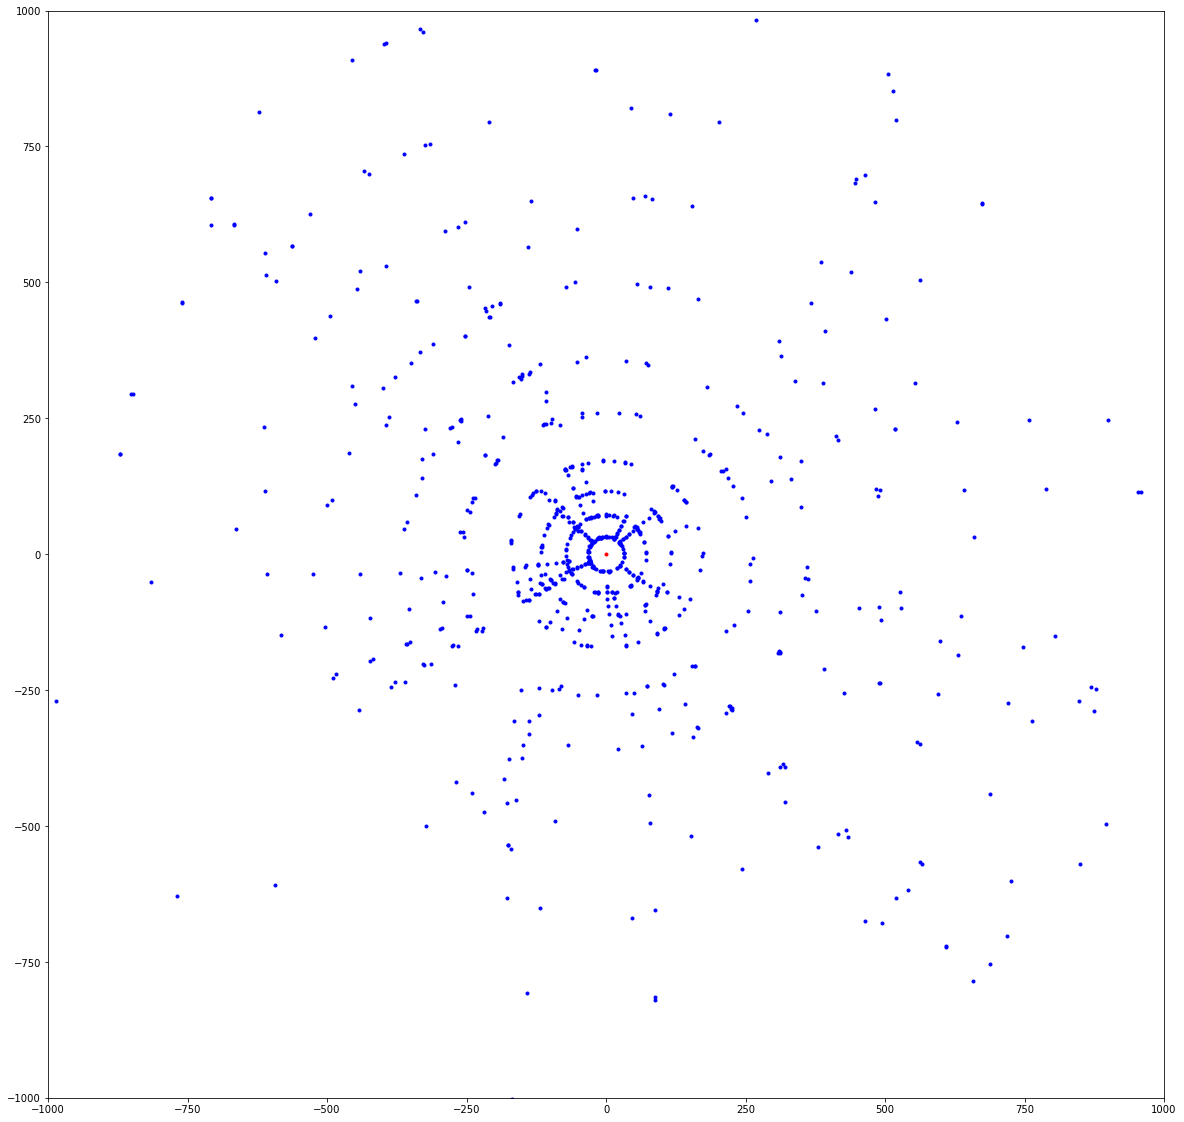

In [4]:
plt.figure(figsize = (20,20))
#plt.subplot(411)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
plt.plot([0], [0], 'r.')
for i in range(len(rotors)):
    size = math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)*0.03
    #plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.axis([-1000,1000,-1000,1000])

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import hdbscan

class Clusterer(object):
    
    def __init__(self, eps):
        self.eps = eps
        
    
    def _preprocess(self, toScan):

        #ss = StandardScaler()
        #X = ss.fit_transform(toScan)
        X = toScan
        return X
    
    
    def scan(self, toScan):
        
        X = self._preprocess(toScan)
        
        #TODO: change min_samples (Determines how detailed the model is)
        #cl = hdbscan.HDBSCAN(min_cluster_size = 7, min_samples = 10)
        cl = DBSCAN(eps=self.eps, min_samples=2, algorithm='kd_tree')
        labels = cl.fit_predict(X)
        
        return labels

clusterer = Clusterer(eps = 0.005)

<Figure size 2000x2000 with 0 Axes>

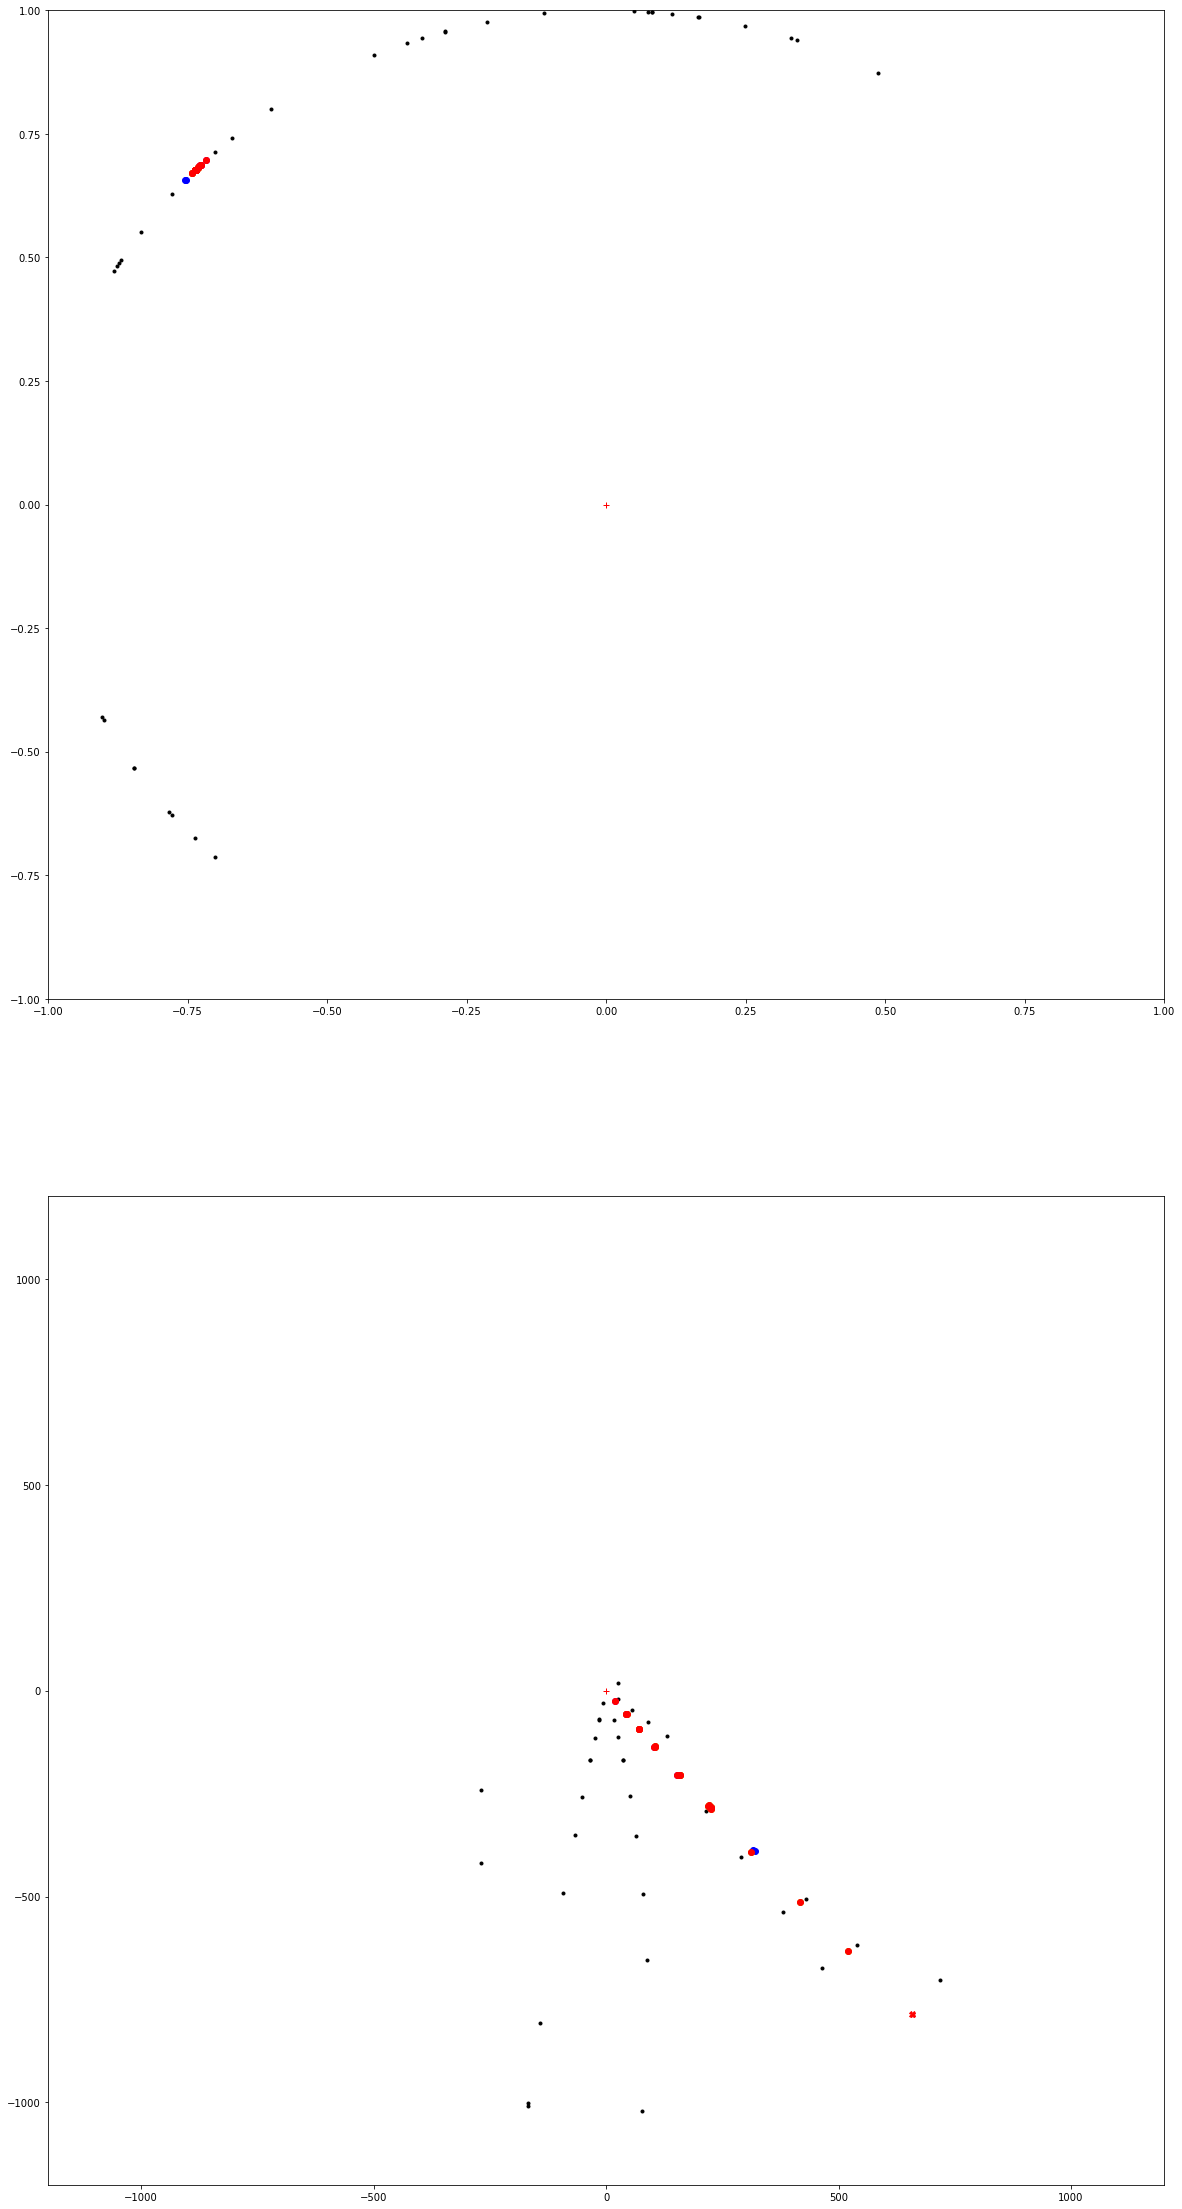

0.9991712773117728 (520.051, -633.06, 818.6)
0.9945645925677414 (416.412, -514.37, 658.2)
0.9910474102338857 (312.295, -391.608, 496.4)
0.9865706700518332 (225.592, -286.553, 359.8)
0.8617067643809051 (225.499, -283.278, 312.0)
0.9854728771808261 (223.641, -284.215, 356.4)
0.8612495551812731 (221.554, -278.65, 306.6)
0.9858771565184244 (219.97, -279.687, 350.8)
0.9792169800986387 (159.856, -205.056, 254.6)
0.8546576869128923 (159.72, -205.141, 222.2)
1.094730443411231 (153.357, -205.608, 280.8)
1.0811590660065362 (103.436, -137.047, 185.635)
0.8410601207203141 (104.141, -136.343, 144.297)
0.965795923375033 (104.835, -135.65, 165.575)
0.8225941482544128 (70.2191, -93.0422, 95.8863)
1.0618102682603439 (70.5072, -92.7428, 123.702)
0.9469087323070113 (70.9421, -92.2909, 110.226)
1.0260799351117318 (44.1305, -57.7033, 74.5387)
0.7872159434717169 (43.2763, -57.9008, 56.9051)
0.9107947462118526 (43.8406, -57.2871, 65.7024)
0.6659354671134168 (18.7886, -25.3726, 21.0248)
1.000651067813648 (657

[-1200, 1200, -1200, 1200]

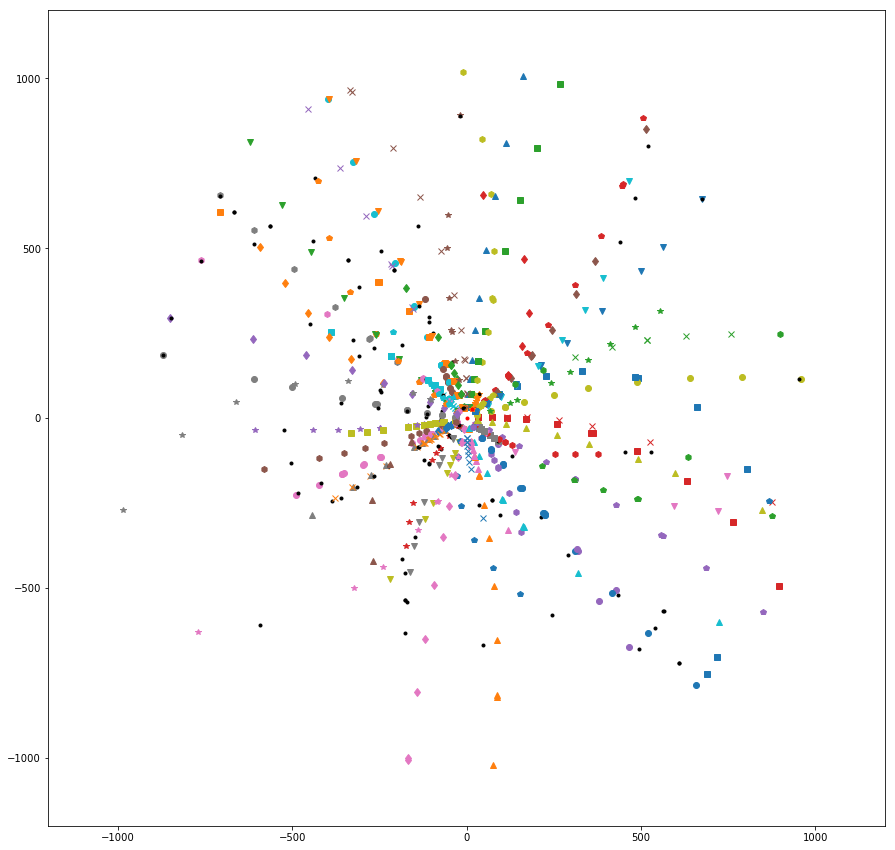

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
plt.figure(figsize = (20,20))

maxDist = math.sqrt(data[0][0]**2 + data[0][1]**2)

zThreshold = 0.4
cutoff = 1.5

#TODO change to hits
visited = [False for i in range(len(data))]
clusters = [-1 for i in range(len(data))]
numClusters = 0
minBucket = 5

#clusters = {1: [(2,3,4), (5,6,8)], 2: [(1,3,4), (7,8)], 3: [(1,2), (5,7)], 6: [(1,5)]}
# change this to hits when submitting #TODO
for i in range(len(data)):
    if visited[i]:
        continue
    toScan = []
    scanIndices = []
    
    xi, yi, zi = data[i]
    rix, riy, riz = rotors[i]
    
    bearing = math.atan2(yi, xi)
    iDist = math.sqrt(xi**2 + yi**2)
    # TODO
    for j in range(len(data)):
        if visited[j]:
            continue
        xj, yj, zj = data[j]
        rjx, rjy, rjz = rotors[j]

        #TODO Undo, testing purposes
        if abs(rjz - riz) > zThreshold or xi*xj + yi*yj < 0 or i == j:
        #if xi*xj + yi*yj < 0 or i == j:
            continue

        jDist = math.sqrt(xj**2 + yj**2)
        ijDist = math.sqrt((xj - xi)**2 + (yj - yi)**2)
        subtendedAngle = math.acos((jDist**2 + ijDist**2 - iDist**2)/(2 * jDist * ijDist))

        jcloser = False
        if subtendedAngle > math.pi/2: #Means j lies closer to the origin (on the circle) than i
            jcloser = True
            subtendedAngle = math.pi - subtendedAngle

        if abs(subtendedAngle) < cutoff:
            crossProductSign = 1 if xi * yj - xj * yi > 0 else -1
            if jcloser:
                crossProductSign = -crossProductSign

            sugAngle = bearing + crossProductSign * subtendedAngle

            toScan.append((math.sin(sugAngle), math.cos(sugAngle), rjz))
            scanIndices.append(j)
    #if i < 40 and i%10 == 0:
    #    plt.subplot(4,1,int(i/10)+1)
    #    plt.plot([y for x,y,z in toScan], [x for x,y,z in toScan], 'b.')
    #if i == 40:
    #    plt.show()
    #print(i, len(toScan))
        
    nBuckets = 300
    buckets = [0 for q in range(nBuckets)]
    bucketScores = [0 for q in range(nBuckets)]
    for f in range(len(toScan)):
        x,y,z = toScan[f]
        index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
        #if index == 286:
            #print("!!!!")
        #print(math.atan2(y,x))
        buckets[index] += 1
        bucketScores[index] += 0.5 + (math.sqrt(data[scanIndices[f]][0]**2 + data[scanIndices[f]][1]**2))/maxDist
        buckets[index - 1] += 1
        bucketScores[index - 1] += 0.5 + (math.sqrt(data[scanIndices[f]][0]**2 + data[scanIndices[f]][1]**2))/maxDist
    #print([(buckets[i], bucketScores[i]) for i in range(nBuckets)])
    mainTrack = bucketScores.index(max(bucketScores)) if max(bucketScores) > minBucket else None
    #print(mainTrack, max(bucketScores))
    
    if i == 0:
        plt.figure(figsize = (20,40))
        plt.subplot(2,1,1)
        #plt.plot([x for x,y,z in toScan], [y for x,y,z in toScan], 'k.')
        colours = ['b', 'g', 'c', 'm', 'y', 'k']
        c = 0
        for f in range(len(toScan)):
            x,y,z = toScan[f]
            index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
            if buckets[index] >= 7 or buckets[index-1] >= 7:
                plt.plot([toScan[f][0]], [toScan[f][1]], colours[int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))%5] + 'o')
            else:
                plt.plot([toScan[f][0]], [toScan[f][1]], 'k.')
            c += 1
        for f in range(len(toScan)):
            x,y,z = toScan[f]
            index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
            if mainTrack and (index == mainTrack or index == mainTrack+1):
                #print("!!!")
                plt.plot([toScan[f][0]], [toScan[f][1]], 'ro')
        plt.plot([0], [0], 'r+')
        plt.axis([-1,1,-1,1])
        plt.subplot(2,1,2)
        #plt.plot([data[m][0] for m in scanIndices], [data[m][1] for m in scanIndices], 'k.')
        colours = ['b', 'g', 'c', 'm', 'y', 'k']
        c = 0
        for f in range(len(toScan)):
            x,y,z = toScan[f]
            index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
            if buckets[index] >= 7 or buckets[index-1] >= 7:
                plt.plot([data[scanIndices[f]][0]], [data[scanIndices[f]][1]], colours[int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))%5] + 'o')
            else:
                plt.plot([data[scanIndices[f]][0]], [data[scanIndices[f]][1]], 'k.')
            c += 1
        for f in range(len(toScan)):
            x,y,z = toScan[f]
            index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
            #print(index)
            if mainTrack and (index == mainTrack or index == mainTrack+1):
                plt.plot([data[scanIndices[f]][0]], [data[scanIndices[f]][1]], 'ro')
        plt.plot([data[i][0]], [data[i][1]], 'rX')
        plt.plot([0], [0], 'r+')
        plt.axis([-1200,1200,-1200,1200])
        plt.show()
    
    if mainTrack:
        for f in range(len(toScan)):
            x,y,z = toScan[f]
            index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
            #print(index)
            if index == mainTrack or index == mainTrack+1:
                print(rotors[scanIndices[f]][2], data[scanIndices[f]])
                visited[scanIndices[f]] = True
                clusters[scanIndices[f]] = numClusters

        visited[i] = True
        clusters[i] = numClusters
        print(rotors[i][2], data[i])

        numClusters += 1
    '''
    groups = clusterer.scan(toScan)
    groups = list(groups)
    #print(scanIndices)
    #print(groups)
    bestGroup = 0
    for k in range(max(groups)+1):
        if groups.count(k) > bestGroup:
            bestGroup = k
    
    group = [i]
    for j in range(len(groups)):
        if groups[j] == bestGroup:
            group.append(scanIndices[j])
            #visited[scanIndices[j]] = True
    clusters.append(group)
    
    iClusters = []
    for group in range(max(groups) + 1):
        cluster = []
        for hit in range(len(groups)):
            if groups[hit] == group:
                cluster.append(scanIndices[hit])
        iClusters.append(cluster)
    
    plt.figure(figsize = (20,40))
    plt.subplot(2,1,1)
    #plt.plot([x for x,y,z in toScan], [y for x,y,z in toScan], 'k.')
    colours = ['b', 'g', 'c', 'm', 'y', 'k']
    c = 0
    for f in range(len(toScan)):
        plt.plot([toScan[f][0]], [toScan[f][1]], colours[groups[f]%5] + '.')
        c += 1
    plt.plot([0], [0], 'r.')
    plt.axis([-1,1,-1,1])
    plt.subplot(2,1,2)
    #plt.plot([data[m][0] for m in scanIndices], [data[m][1] for m in scanIndices], 'k.')
    colours = ['b', 'g', 'c', 'm', 'y', 'k']
    c = 0
    for f in range(len(toScan)):
        plt.plot([data[scanIndices[f]][0]], [data[scanIndices[f]][1]], colours[groups[f]%5] + '.')
        c += 1
    plt.plot([data[i][0]], [data[i][1]], 'r.')
    plt.plot([0], [0], 'r.')
    plt.axis([-1200,1200,-1200,1200])
    plt.show()

    #print(iClusters)
    
    #clusters[i] = iClusters
    '''
plt.figure(figsize = (15,15))
colours = ['b', 'g', 'c', 'm', 'y', 'k']
shapes = ['o', '^', 'v', 's', 'p', 'x', 'd', '*', 'h']
for i in range(len(data)):
    if clusters[i] != -1:
        plt.plot(data[i][0],
                 data[i][1],
                 'C' + str(clusters[i]%10) + shapes[clusters[i]%9])
    else:
        plt.plot(data[i][0],
                 data[i][1],
                 'k.')
plt.plot([data[i][0]], [data[i][1]], 'r.')
plt.plot([0], [0], 'r.')
plt.axis([-1200,1200,-1200,1200])